<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from mlxtend.plotting import category_scatter
import pandas as pd
import numpy as np


In [2]:
# 1. toy 데이터
X, y = datasets.make_blobs(centers=4, random_state=8)
y = y%2


In [4]:
import matplotlib.pyplot as plt


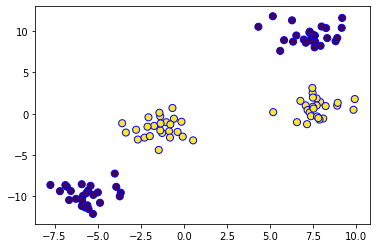

In [5]:

# 그래프 확인
plt.scatter(X[:,0],X[:,1],c=y,s=50,edgecolors="b")

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [8]:
# 2. 2번째 특성 제곱하여 추가
X_new = np.hstack([X,X[:,1:]**2]) # 제곱을 새로운 열로 만들어 줌
X_new[:4]

array([[-1.72161036, -1.48033142,  2.19138111],
       [-3.6573384 , -9.5482383 , 91.16885455],
       [ 7.0778163 ,  0.99508772,  0.99019957],
       [-1.36579859, -0.3148625 ,  0.09913839]])

Text(0.5, 0, 'feature0 ** 2')

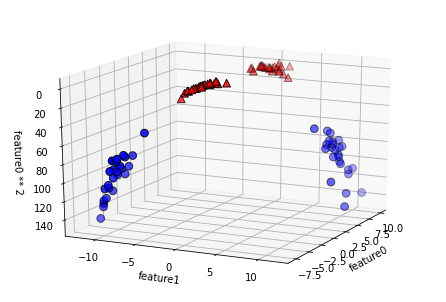

In [9]:
# 그래프 확인
figure = plt.figure()
ax = Axes3D(figure, elev=-162, azim=-26) # 각도 틀어주는 파라미터 
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature0 ** 2')

- 1번째 열의 값을 제곱하여 2번째 열로 붙이는 작업 수행

- 3D 그래프를 위해 Axes3D를 이용함

- y 는 0과 1인 2개의 클래스 -> mask를 통하여 y가 0인지 1인지를 구분하여 0인 행은 파란색, 1인 행은 빨간색으로 표시



Text(0.5, 0, 'feature0 ** 2')

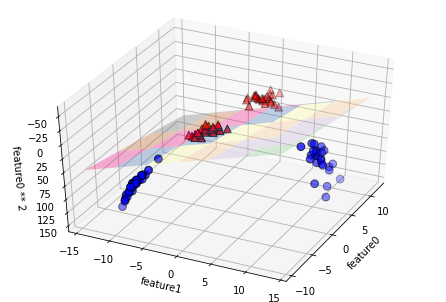

In [11]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그려주기

figure = plt.figure()
ax = Axes3D(figure, elev=-140, azim=-26)

xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max()+2,50)



# 평면 그려주기 위해 조금 범위 넓게 (+2) 만큼 해줌

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]*YY+intercept)/(-coef[2])

ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3,cmap=cm.Accent)

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature0 ** 2')

**주요 parameter

gamma :가우시안 커널의 반경을 결정.

감마 값이 크면 커널의 반경 좁아짐 -> 훈련에 각각의 데이터 포인트를 더욱 반영 -> 복잡한 증가

감마 값이 작으면 커널의 반경 넓어짐 -> 훈련에 더 넓은 면적에 걸친 데이터 포인트를 반영 -> 복잡도 감소

C: cost function 과 동일
즉,  C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정, gamma는 결정 경계의 곡률을 결정



In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# 모든 특성 정규화

# 1) 트레인 데이터 특성별 최소값/최대값 추출
X_train_min = X_new.min(axis = 0)
X_train_max = X_new.max(axis = 0)

In [18]:
# 2) 트레인 데이터 특성별 범위
X_train_range = X_train_max - X_train_min

In [19]:
# 3) 트레인 데이터 정규화
X_train_scaled = (X_new-X_train_min)/X_train_range


In [20]:
# 4) 정규화 확인
print("특성별 최소값\n {}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소값
 [0. 0. 0.]
특성별 최대값
 [1. 1. 1.]


  5) 테스트 데이터 정규화는 train 데이터의 범위로 계산해줌

-> test 데이터를 범위로 하게 되면 들어올 때마다 값이 변경되기 때문에 train 데이터 범위를 사용하는 것이다. ( + train 데이터의 추출양이 많아 데이터를 잘 설명한다고 할 수 있다. )

만약, train 데이터보다 test 데이터가 더 많은 경우 test는 test의 범위를 사용하는 것이 좋을 수도 있다.

